In [604]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import json
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import os

## 資料前處理

In [605]:
label_mapping = {
    '11': '1-1','10': '1-2','9': '1-3','8': '1-4','7': '1-5','6': '1-6','5': '1-7','4': '1-8','3': '1-9','2': '1-10','1': '1-11',
    '12': '2-1','30': '2-11',
    '13': '3-1','29': '3-11',
    '14': '4-1','28': '4-11',
    '15': '5-1','27': '5-11',
    '16': '6-1','17': '6-2','18': '6-3','19': '6-4','20': '6-5','21': '6-6','22': '6-7','23': '6-8','24': '6-9','25': '6-10','26': '6-11',
    '49': '7-1','31': '7-11',
    '48': '8-1','32': '8-11',
    '47': '9-1','33': '9-11',
    '46': '10-1','34': '10-11',
    '45': '11-1','44': '11-2','43': '11-3','42': '11-4','41': '11-5','40': '11-6','39': '11-7','38': '11-8','37': '11-9','36': '11-10','35': '11-11'
}

In [ ]:
# path_template = 'standalized_timestamp_allignment_{date}_rtt_logs.csv'
# path_template = 'timestamp_allignment_Balanced_{date}_rtt_logs.csv'

path = 'timestamp_allignment_Balanced_2024_12_21_rtt_logs.csv'
# path = 'All together\\14_21_27datacombine.csv'

# selected_columns = ['Label', 'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']

selected_columns = ['Label', 'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)'] 

# selected_columns = ['Label', 'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi',
#                     'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)'] 

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)',
#                     'AP1_Rssi','AP2_Rssi']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)',
#                     'AP1_StdDev (mm)','AP2_StdDev (mm)','AP3_StdDev (mm)','AP4_StdDev (mm)']   

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)',
#                     'AP1_StdDev (mm)','AP2_StdDev (mm)','AP3_StdDev (mm)','AP4_StdDev (mm)',
#                     'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']  

# selected_columns = ['Label', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)','AP3_Corrected Distance (mm)','AP4_Corrected Distance (mm)',
#                     'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']

# selected_columns = ['Label', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)','AP3_Corrected Distance (mm)','AP4_Corrected Distance (mm)']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP1_Rssi','AP2_Rssi', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)']

In [607]:
ti = "4rssi"
date = "2024_12_14"

In [608]:
data = pd.read_csv(path, usecols=selected_columns)

test_size=0.2
val_size=0.1

target_column = 'Label'  # 替換成目標欄位名稱

# # 替換目標欄位的 label
# data[target_column] = data[target_column].astype(str).map(label_mapping)

# # 只對需要映射的值進行處理，保留已正確的值
# data[target_column] = data[target_column].apply(
#     lambda x: label_mapping[x] if x in label_mapping else x
# )

# # 確認是否有未映射的值
# unmapped_values = data[target_column][data[target_column].isna()].unique()
# if len(unmapped_values) > 0:
#     print("以下值未找到對應的映射：", unmapped_values)

# # 確認是否有未映射的值
# unmapped_values = data[target_column][~data[target_column].isin(label_mapping.values())].unique()
# if len(unmapped_values) > 0:
#     print("以下值未找到對應的映射：", unmapped_values)

data


,Label,AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-1,-62.0,-72.0,-47.0,-64.0
1,1-1,-62.0,-72.0,-47.0,-64.0
2,1-1,-57.0,-72.0,-45.0,-60.0
3,1-1,-62.0,-72.0,-47.0,-63.0
4,1-1,-62.0,-72.0,-48.0,-63.0
...,...,...,...,...,...
21359,9-11,-48.0,-67.0,-63.0,-55.0
21360,9-11,-56.0,-66.0,-63.0,-56.0
21361,9-11,-55.0,-66.0,-61.0,-56.0
21362,9-11,-56.0,-66.0,-63.0,-56.0


### 資料切割

### 資料前處理


In [609]:
label_column = 'Label'

In [610]:
# 資料前處理 (一): 刪除前後n筆資料
n = 1
# 確保依據Label排序
data = data.sort_values(by=label_column).reset_index(drop=True)

# 建立一個空的 DataFrame 用於存放處理後的資料
processed_data = pd.DataFrame(columns=data.columns)

# 針對每個Label群組進行處理
for label, group in data.groupby(label_column):
    # 刪除前n筆和後n筆資料
    if len(group) > 2 * n:  # 確保群組資料足夠
        group = group.iloc[n:-n]
    else:
        group = pd.DataFrame()  # 若資料不足，刪除整個群組
    # 將處理後的群組資料加入
    processed_data = pd.concat([processed_data, group], ignore_index=True)

processed_data


C:\Users\吳定洋\AppData\Local\Temp\ipykernel_15612\2255483106.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  processed_data = pd.concat([processed_data, group], ignore_index=True)


,Label,AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-1,-57.0,-72.0,-47.0,-64.0
1,1-1,-62.0,-72.0,-47.0,-64.0
2,1-1,-62.0,-72.0,-47.0,-64.0
3,1-1,-62.0,-72.0,-43.0,-63.0
4,1-1,-62.0,-72.0,-48.0,-62.0
...,...,...,...,...,...
21261,9-11,-44.0,-67.0,-54.0,-57.0
21262,9-11,-56.0,-66.0,-63.0,-57.0
21263,9-11,-56.0,-66.0,-65.0,-55.0
21264,9-11,-56.0,-66.0,-65.0,-56.0


In [611]:
# Calculate the number of rows with NaN values
nan_rows = processed_data.isnull().any(axis=1).sum()

# Print the result
print(f"Number of rows with NaN values: {nan_rows}")

# 找出包含 NaN 的列
rows_with_nan = processed_data[processed_data.isnull().any(axis=1)]

# 印出這些列
print("Rows with NaN values:")
print(rows_with_nan)

Number of rows with NaN values: 1607
Rows with NaN values:
      Label  AP1_Rssi  AP2_Rssi  AP3_Rssi  AP4_Rssi
33      1-1       NaN       NaN     -47.0     -64.0
35      1-1       NaN     -72.0     -43.0     -64.0
60      1-1       NaN     -72.0     -44.0     -61.0
71      1-1     -62.0     -72.0       NaN       NaN
90      1-1     -62.0     -72.0       NaN     -61.0
...     ...       ...       ...       ...       ...
21158  9-11       NaN       NaN     -63.0     -55.0
21193  9-11       NaN       NaN     -64.0       NaN
21221  9-11     -56.0     -67.0       NaN     -57.0
21232  9-11       NaN       NaN     -58.0     -56.0
21239  9-11     -56.0     -67.0       NaN       NaN

[1607 rows x 5 columns]


### 選一個做

In [612]:
data_imputed = processed_data.groupby(label_column).apply(
    lambda group: group.fillna(group.mean())
).reset_index()
data_imputed


,Label,level_1,AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-1,0,-57.0,-72.0,-47.0,-64.0
1,1-1,1,-62.0,-72.0,-47.0,-64.0
2,1-1,2,-62.0,-72.0,-47.0,-64.0
3,1-1,3,-62.0,-72.0,-43.0,-63.0
4,1-1,4,-62.0,-72.0,-48.0,-62.0
...,...,...,...,...,...,...
21261,9-11,21261,-44.0,-67.0,-54.0,-57.0
21262,9-11,21262,-56.0,-66.0,-63.0,-57.0
21263,9-11,21263,-56.0,-66.0,-65.0,-55.0
21264,9-11,21264,-56.0,-66.0,-65.0,-56.0


## 選擇使用 model

# K-fold

### KNN & evaluation:accuracy


In [613]:
label_to_coordinates = {
    "1-1": (0, 0), "1-2": (0.6, 0), "1-3": (1.2, 0), "1-4": (1.8, 0), "1-5": (2.4, 0), "1-6": (3.0, 0),"1-7": (3.6, 0), "1-8": (4.2, 0), "1-9": (4.8, 0), "1-10": (5.4, 0), "1-11": (6.0, 0),
    "2-1": (0, 0.6), "2-11": (6.0, 0.6),
    "3-1": (0, 1.2), "3-11": (6.0, 1.2),
    "4-1": (0, 1.8), "4-11": (6.0, 1.8),
    "5-1": (0, 2.4), "5-11": (6.0, 2.4),
    "6-1": (0, 3.0), "6-2": (0.6, 3.0), "6-3": (1.2, 3.0), "6-4": (1.8, 3.0), "6-5": (2.4, 3.0),"6-6": (3.0, 3.0), "6-7": (3.6, 3.0), "6-8": (4.2, 3.0), "6-9": (4.8, 3.0), "6-10": (5.4, 3.0), "6-11": (6.0, 3.0),
    "7-1": (0, 3.6), "7-11": (6.0, 3.6),
    "8-1": (0, 4.2), "8-11": (6.0, 4.2),
    "9-1": (0, 4.8), "9-11": (6.0, 4.8),
    "10-1": (0, 5.4), "10-11": (6.0, 5.4),
    "11-1": (0, 6.0), "11-2": (0.6, 6.0), "11-3": (1.2, 6.0), "11-4": (1.8, 6.0), "11-5": (2.4, 6.0),"11-6": (3.0, 6.0), "11-7": (3.6, 6.0), "11-8": (4.2, 6.0), "11-9": (4.8, 6.0), "11-10": (5.4, 6.0), "11-11": (6.0, 6.0)
}

In [614]:
# report files
file_path = 'Final use\\KNN\\knn_report_{date}.txt'

In [615]:

# 把label部分拿掉
X = data_imputed.drop(columns=['level_1','Label'])
y = data_imputed[target_column]

print("X type")
print(X.dtypes)
print("y type")
print(y.dtypes)

# 使用 Z-score 標準化
scaler = StandardScaler()
selected_columns.remove('Label')
X[selected_columns] = scaler.fit_transform(X[selected_columns])
X_scaled = scaler.fit_transform(X[selected_columns])

print(X_scaled[0])

# X_scaled, y

X type
AP1_Rssi    float64
AP2_Rssi    float64
AP3_Rssi    float64
AP4_Rssi    float64
dtype: object
y type
object
[ 0.57394163 -1.1408636   1.72819274 -1.14240693]


In [616]:
print(X)

       AP1_Rssi  AP2_Rssi  AP3_Rssi  AP4_Rssi
0      0.573942 -1.140864  1.728193 -1.142407
1     -0.283545 -1.140864  1.728193 -1.142407
2     -0.283545 -1.140864  1.728193 -1.142407
3     -0.283545 -1.140864  2.361607 -0.946019
4     -0.283545 -1.140864  1.569839 -0.749631
...         ...       ...       ...       ...
21261  2.803406 -0.037759  0.619718  0.232308
21262  0.745439  0.182862 -0.805464  0.232308
21263  0.745439  0.182862 -1.122171  0.625084
21264  0.745439  0.182862 -1.122171  0.428696
21265  0.916936  0.182862 -0.963817  0.625084

[21266 rows x 4 columns]


In [617]:
dataamount = 300
# N_val = 20

N_train = dataamount # 訓練集每個類別至少要有 N_train 筆資料
test_val_ratio = 1  # 剩餘資料中，50% 作為驗證集，50% 作為測試集

In [618]:
# 轉為 DataFrame 方便操作
data = pd.DataFrame(X_scaled)
data['label'] = y  # 加入 label 欄位

print(data)

              0         1         2         3 label
0      0.573942 -1.140864  1.728193 -1.142407   1-1
1     -0.283545 -1.140864  1.728193 -1.142407   1-1
2     -0.283545 -1.140864  1.728193 -1.142407   1-1
3     -0.283545 -1.140864  2.361607 -0.946019   1-1
4     -0.283545 -1.140864  1.569839 -0.749631   1-1
...         ...       ...       ...       ...   ...
21261  2.803406 -0.037759  0.619718  0.232308  9-11
21262  0.745439  0.182862 -0.805464  0.232308  9-11
21263  0.745439  0.182862 -1.122171  0.625084  9-11
21264  0.745439  0.182862 -1.122171  0.428696  9-11
21265  0.916936  0.182862 -0.963817  0.625084  9-11

[21266 rows x 5 columns]


In [619]:
train_data_full = data.groupby('label', group_keys=False).sample(n=N_train, replace=False,random_state=42) 

# train_data_full

# sss = StratifiedShuffleSplit(n_splits=1, test_size=N_val / N_train,random_state=42) 
# train_index, val_index = next(sss.split(train_data_full.drop(columns=['label']), train_data_full['label']))

train_data_full.drop(columns=['label'])


# train_data = train_data_full.iloc[train_index]
# val_data = train_data_full.iloc[val_index]

train_data = train_data_full
remaining_data = data.drop(train_data_full.index)

In [620]:
# 將特徵欄位加入欄名（selected_columns 去除 Label）
feature_names = selected_columns.copy()
print("Feature names")
print(feature_names)

Feature names
['AP1_Rssi', 'AP2_Rssi', 'AP3_Rssi', 'AP4_Rssi']


In [621]:

# 重新建立有欄名的 DataFrame，並補上 label
train_data_named = pd.DataFrame(train_data.drop(columns=['label']).values, columns=feature_names)
train_data_named['label'] = train_data['label'].values

# val_data_named = pd.DataFrame(val_data.drop(columns=['label']).values, columns=feature_names)
# val_data_named['label'] = val_data['label'].values

test_data_named = pd.DataFrame(remaining_data.drop(columns=['label']).values, columns=feature_names)
test_data_named['label'] = remaining_data['label'].values


In [622]:
X_train, y_train = train_data.drop(columns=['label']).values, train_data['label'].values

# X_val, y_val = val_data.drop(columns=['label']).values, val_data['label'].values

X_test, y_test = remaining_data.drop(columns=['label']).values, remaining_data['label'].values


print("train data")
print(len(X_test))


train data
6566


In [623]:
# **計算每個 Set 內各 Label 的資料數量**
train_label_counts = pd.Series(y_train).value_counts().sort_index()
# val_label_counts = pd.Series(y_val).value_counts().sort_index()
test_label_counts = pd.Series(y_test).value_counts().sort_index()

# **確保所有 Labels 都有出現在三個 Set 裡**
# all_labels = sorted(set(train_label_counts.index) | set(val_label_counts.index) | set(test_label_counts.index))
all_labels = sorted(set(train_label_counts.index) | set(test_label_counts.index))
label_distribution = pd.DataFrame(index=all_labels)

label_distribution["Training Set"] = train_label_counts
# label_distribution["Validation Set"] = val_label_counts
label_distribution["Test Set"] = test_label_counts

# **用 0 填補缺失值（表示該 Label 在該 Set 中沒有數據）**
label_distribution = label_distribution.fillna(0).astype(int)

from IPython.display import display
display(label_distribution)


,Training Set,Test Set
1-1,300,134
1-10,300,134
1-11,300,134
1-2,300,134
1-3,300,134
1-4,300,134
1-5,300,134
1-6,300,134
1-7,300,134
1-8,300,134


In [624]:
# 建立反向映射字典
reverse_label_mapping = {v: int(k) for k, v in label_mapping.items()}
y_train_numeric = np.array([reverse_label_mapping[label] for label in y_train])

print("reverse_label_mapping in KNN:", reverse_label_mapping)


print(X_train)

reverse_label_mapping in KNN: {'1-1': 11, '1-2': 10, '1-3': 9, '1-4': 8, '1-5': 7, '1-6': 6, '1-7': 5, '1-8': 4, '1-9': 3, '1-10': 2, '1-11': 1, '2-1': 12, '2-11': 30, '3-1': 13, '3-11': 29, '4-1': 14, '4-11': 28, '5-1': 15, '5-11': 27, '6-1': 16, '6-2': 17, '6-3': 18, '6-4': 19, '6-5': 20, '6-6': 21, '6-7': 22, '6-8': 23, '6-9': 24, '6-10': 25, '6-11': 26, '7-1': 49, '7-11': 31, '8-1': 48, '8-11': 32, '9-1': 47, '9-11': 33, '10-1': 46, '10-11': 34, '11-1': 45, '11-2': 44, '11-3': 43, '11-4': 42, '11-5': 41, '11-6': 40, '11-7': 39, '11-8': 38, '11-9': 37, '11-10': 36, '11-11': 35}
[[-0.28354485 -1.1408636   1.72819274 -0.55324338]
 [ 0.57394163 -1.1408636   2.36160685 -1.14240693]
 [ 1.25993081 -1.1408636   2.04489979 -1.14240693]
 ...
 [ 0.74543892 -0.03775859 -0.80546371  0.23230802]
 [ 0.74543892 -0.03775859 -0.96381723  0.62508372]
 [ 0.74543892  0.18286241 -0.17204959  0.82147157]]


Fold 1 - Accuracy: 0.9289
Fold 1 - MDE: 0.1920


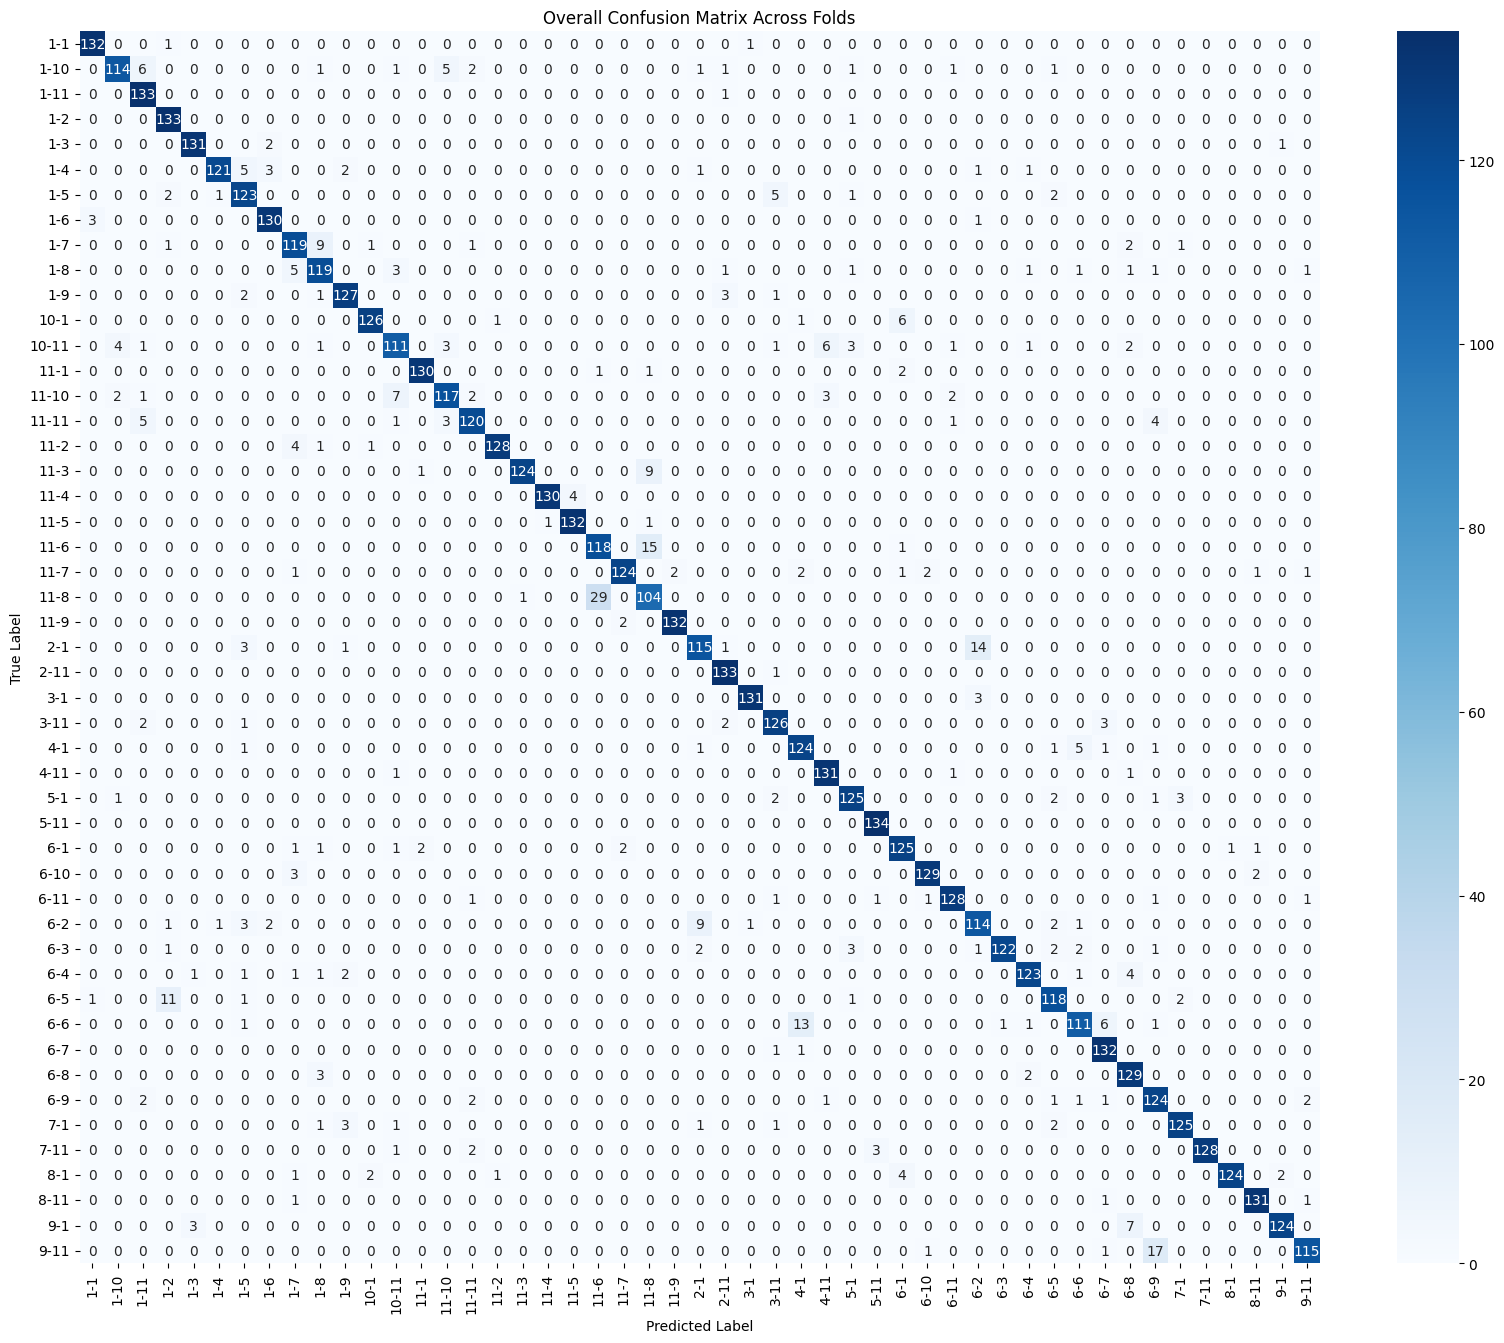

MDE report saved to: mde_report_2024_12_14.json
Classification report saved to: accuracy_report_2024_12_14.txt


In [625]:
overall_accuracy = []
fold_reports = []

overall_mde = []  # 用於儲存每個 fold 的平均 MDE
mde_report = {}


# 初始化儲存所有 folds 的真實值和預測值
all_y_test = []
all_y_test_pred = []


# 建立 KNN 模型
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')

knn.fit(X_train, y_train_numeric)

# 預測
y_test_pred_numeric  = knn.predict(X_test)


# 將數值標籤轉換回字串標籤
y_test_pred_labels = [label_mapping[str(num)] for num in y_test_pred_numeric]   

# 儲存當前 fold 的 y_test 和 y_test_pred
all_y_test.extend(y_test)  # 累積所有真實值
all_y_test_pred.extend(y_test_pred_labels)  # 累積所有預測值


# 計算整體準確率
accuracy = accuracy_score(y_test, y_test_pred_labels)
overall_accuracy.append(accuracy)

# MDE
    # Calculate MDE metrics
y_test_pred_coordinates = np.array([label_to_coordinates[label] for label in y_test_pred_labels])
y_test_coordinates = np.array([label_to_coordinates[label] for label in y_test])

distances = np.linalg.norm(y_test_pred_coordinates - y_test_coordinates, axis=1)

fold_mde = np.mean(distances)  # 計算當前 fold 的平均 MDE
overall_mde.append(fold_mde)  # 儲存當前 fold 的平均 MDE

# 累積 MDE 數據
for true_label, distance in zip(y_test, distances):
    if true_label not in mde_report:
        mde_report[true_label] = []
    mde_report[true_label].append(distance)  # 累積所有 fold 的距離數據



# 計算分類報告
report = classification_report(
    y_test, y_test_pred_labels,
    target_names=[str(label) for label in np.unique(y)],
    zero_division=0,
    output_dict=True  # 以字典形式輸出，方便進一步分析
)
fold_reports.append(report)

print(f"Fold {1} - Accuracy: {accuracy:.4f}")
print(f"Fold {1} - MDE: {fold_mde:.4f}")

    


unique_labels = sorted(np.unique(all_y_test))  # 確保標籤排序一致
# 在所有 folds 結束後，繪製總體混淆矩陣
all_cm = confusion_matrix(all_y_test, all_y_test_pred, labels=np.unique(y))

plt.figure(figsize=(20, 16))
sns.heatmap(all_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Overall Confusion Matrix Across Folds")
plt.savefig("Overall_Confusion_Matrix.png")
plt.show()

# # 計算每個標籤的平均 MDE
# avg_mde_report = {label: np.mean(distances) for label, distances in mde_report.items()}

# 計算每個標籤的平均 MDE
avg_mde_report = {label: {"mde": np.mean(distances), "count": len(distances)} for label, distances in mde_report.items()}


# 儲存到 JSON 檔案
file_path = f"mde_report_{date}.json"
# Check if the file exists, and create it if it doesn't
if not os.path.exists(file_path):
    with open(file_path, 'w') as f:
        f.write("")  # Create an empty file

with open(file_path, "w") as f:
    json.dump(avg_mde_report, f, indent=4)
print(f"MDE report saved to: {file_path}")

# 計算每個類別的平均性能
avg_report = {}
for label in np.unique(y):
    label = str(label)
    avg_report[label] = {
        "precision": np.mean([report[label]["precision"] for report in fold_reports if label in report]),
        "recall": np.mean([report[label]["recall"] for report in fold_reports if label in report]),
        "f1-score": np.mean([report[label]["f1-score"] for report in fold_reports if label in report])
    }


file_path = f'accuracy_report_{date}.txt'
# Check if the file exists, and create it if it doesn't
if not os.path.exists(file_path):
    with open(file_path, 'w') as f:
        f.write("")  # Create an empty file

# Write the classification report to the file
with open(file_path, "w") as f:
    json.dump(report, f, indent=4)

print(f"Classification report saved to: {file_path}")


# # 打印所有 fold 的平均 Accuracy 和 MDE
# avg_accuracy = np.mean(overall_accuracy)
# avg_mde = np.mean(overall_mde)
# print(f"\nAverage Accuracy across {1} folds: {avg_accuracy:.4f}")
# print("\nAverage Classification Report per Label:")
# for label, metrics in avg_report.items():
#     print(f"Label {label} - Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1-score: {metrics['f1-score']:.4f}")
# print(f"Average MDE across {1} folds: {avg_mde:.4f}")


## Accuracy 畫圖

In [626]:
# Title = f"{date} {ti} Accuracy"
# file_path = f'accuracy_report_{date}.txt'

# # Load the figure.txt JSON file
# with open(file_path) as file:
#     data = json.load(file)

# print(data)

# # Filter out keys that are not class labels (e.g., "accuracy", "macro avg")
# filtered_data = {k: v for k, v in data.items() if '-' in k}

# print(filtered_data)

# # Extract precision values without mapping
# precision_values = {k: v['precision'] for k, v in filtered_data.items()}

# precision_values

# # Grid layout (11x11)
# rows, cols = 11, 11
# grid = np.full((rows, cols), np.nan)  # Initialize grid with NaN
# labels = np.empty((rows, cols), dtype=object)  # Initialize grid for labels

# # Populate the grid with precision values and labels (reverse row index for correct plotting)
# for key, value in precision_values.items():
#     if '-' in key:
#         r, c = map(int, key.split('-'))
#         grid[rows - r, c - 1] = value  # Reverse rows for top-left (1-1) to bottom-left (11-1)
#         labels[rows - r, c - 1] = key

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 10))
# cmap = plt.cm.Reds_r  # Color map

# # 設定自定義顏色範圍
# vmin = 0  # 最小值對應的顏色
# vmax = np.nanmax(grid) * 0.5  # 最大值對應的顏色 (縮小範圍讓顏色對比更明顯)

# log_grid = np.log(grid + 1e-6)  # 避免取 log(0)

# # Draw grid with precision values and labels
# for i in range(rows):
#     for j in range(cols):
#         value = grid[i, j]
#         label = labels[i, j]
#         if not np.isnan(value):
#             ax.text(j, i + 0.2, f'{label}', ha='center', va='center', color='black', fontsize=10)
#             ax.text(j, i - 0.2, f'{value:.4f}', ha='center', va='center', color='red', fontsize=12)
#         rect_color = cmap(value / np.nanmax(log_grid)) if not np.isnan(value) else 'white'
#         ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=rect_color, alpha=0.5))


# # Format grid
# ax.set_xlim(-0.5, cols - 0.5)
# ax.set_ylim(-0.5, rows - 0.5)
# ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
# ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
# ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
# ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# plt.title(Title)
# plt.show()

##  MDE 畫圖

In [627]:
# Title = f"{date} {ti} MDE"
# Title = "2024_12_14 KNN rssi rtt MDE"
# file_path = f'mde_report_{date}.json'

# # 載入 JSON 報告
# with open(file_path) as file:
#     mde_data = json.load(file)

# # 將 MDE 填入網格
# rows, cols = 11, 11
# grid = np.full((rows, cols), np.nan)  # 初始化網格
# labels = np.empty((rows, cols), dtype=object)  # 初始化標籤

# # 填充網格數據
# for key, value in mde_data.items():
#     if '-' in key:
#         r, c = map(int, key.split('-'))
#         grid[rows - r, c - 1] = value["mde"]  # 反轉行索引以正確對應圖表
#         labels[rows - r, c - 1] = key

# # 繪製圖表
# fig, ax = plt.subplots(figsize=(10, 10))
# cmap = plt.cm.Reds  # 顏色映射

# # 畫出每個網格
# for i in range(rows):
#     for j in range(cols):
#         value = grid[i, j]
#         label = labels[i, j]
#         if not np.isnan(value):
#             ax.text(j, i + 0.2, f'{label}', ha='center', va='center', color='black', fontsize=10)
#             ax.text(j, i - 0.2, f'{value:.4f}', ha='center', va='center', color='blue', fontsize=12)
#         rect_color = cmap(value / np.nanmax(grid)) if not np.isnan(value) else 'white'
#         ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=rect_color, alpha=0.5))

# # 格式化圖表
# ax.set_xlim(-0.5, cols - 0.5)
# ax.set_ylim(-0.5, rows - 0.5)
# ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
# ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
# ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
# ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# plt.title(Title)
# plt.show()


In [628]:
from sklearn.inspection import permutation_importance

features = ['AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']

y_test_numeric = np.array([reverse_label_mapping[label] for label in y_test])


# 2. 檢查模型 baseline 準確率
print("Baseline Accuracy:", knn.score(X_test, y_test_numeric))

# 3. 檢查特徵標準差
print("X_test std:", X_test.std(axis=0))

# 4. 再執行 permutation importance
result = permutation_importance(knn, X_test, y_test_numeric, n_repeats=30, random_state=42)



for i in result.importances_mean.argsort()[::-1]:
    print(f"{features[i]}: {result.importances_mean[i]:.6f} ± {result.importances_std[i]:.6f}")

Baseline Accuracy: 0.9288760280231496
X_test std: [0.99769349 0.99733426 0.99266287 1.00142524]
AP2_Rssi: 0.581247 ± 0.003736
AP4_Rssi: 0.490365 ± 0.005117
AP1_Rssi: 0.474297 ± 0.005179
AP3_Rssi: 0.395634 ± 0.004612
